## Load in packages and data

In [1]:
import numpy as np
import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt
import matsim_output_analysis as moa
import operator

In [2]:
df = pd.read_csv(r"2000_sample.csv") #using look3, ignoring some fields such as carCO2
# df_spare = df #for resetting if needed

In [3]:
# df = df_spare 
df = df[~df["subpopulation"].isin(["hgv","lgv","airport", "lgv_ev"])] #choose only the actual people
df["negative_utility_somewhere"] = df.apply(lambda row: moa.neg_utility_somewhere(row), axis=1)
x = (sum(df["negative_utility_somewhere"])/len(df))*100
print(str(round(x,2))+" pc of people have a negative utility")
# df = df[df["negative_utility_somewhere"]==0] # keep only positive utility people
df=df[df["region"]=="East of England"] #temporarily remove Londoners while I sort the road pricing out
df = df.drop("negative_utility_somewhere", axis=1)

#TODO: decide how to handle negatives properly
#TODO: add London back in once road pricing has been sorted

6.61 pc of people have a negative utility


In [4]:
#turn plan summaries into lists instead of long strings
df['selected plan activity_type_or_mode'] = df['selected plan activity_type_or_mode'].str.split('; ')
df['selected plan distance_travelled'] = df['selected plan distance_travelled'].str.split('; ')
df['selected plan duration'] = df['selected plan duration'].str.split('; ')
df['selected plan location'] = df['selected plan location'].str.split('; ')

df['unselected plan (1) activity_type_or_mode'] = df['unselected plan (1) activity_type_or_mode'].str.split('; ')
df['unselected plan (1) distance_travelled'] = df['unselected plan (1) distance_travelled'].str.split('; ')
df['unselected plan (1) duration'] = df['unselected plan (1) duration'].str.split('; ')
df['unselected plan (1) location'] = df['unselected plan (1) location'].str.split('; ')

df['unselected plan (2) activity_type_or_mode'] = df['unselected plan (2) activity_type_or_mode'].str.split('; ')
df['unselected plan (2) distance_travelled'] = df['unselected plan (2) distance_travelled'].str.split('; ')
df['unselected plan (2) duration'] = df['unselected plan (2) duration'].str.split('; ')
df['unselected plan (2) location'] = df['unselected plan (2) location'].str.split('; ')

df['unselected plan (3) activity_type_or_mode'] = df['unselected plan (3) activity_type_or_mode'].str.split('; ')
df['unselected plan (3) distance_travelled'] = df['unselected plan (3) distance_travelled'].str.split('; ')
df['unselected plan (3) duration'] = df['unselected plan (3) duration'].str.split('; ')
df['unselected plan (3) location'] = df['unselected plan (3) location'].str.split('; ')

df['unselected plan (4) activity_type_or_mode'] = df['unselected plan (4) activity_type_or_mode'].str.split('; ')
df['unselected plan (4) distance_travelled'] = df['unselected plan (4) distance_travelled'].str.split('; ')
df['unselected plan (4) duration'] = df['unselected plan (4) duration'].str.split('; ')
df['unselected plan (4) location'] = df['unselected plan (4) location'].str.split('; ')

## Remove "pt interaction" terms and all corresponding columns

In [5]:
#extract the indices of where pt interaction happens
df['selected plan ptinteraction_indices'] = df['selected plan activity_type_or_mode'].apply(moa.get_ptinteraction_index)
df['unselected plan (1) ptinteraction_indices'] = df['unselected plan (1) activity_type_or_mode'].apply(moa.get_ptinteraction_index)
df['unselected plan (2) ptinteraction_indices'] = df['unselected plan (2) activity_type_or_mode'].apply(moa.get_ptinteraction_index)
df['unselected plan (3) ptinteraction_indices'] = df['unselected plan (3) activity_type_or_mode'].apply(moa.get_ptinteraction_index)
df['unselected plan (4) ptinteraction_indices'] = df['unselected plan (4) activity_type_or_mode'].apply(moa.get_ptinteraction_index)

In [6]:
#remove the pt interaction activities
df['selected plan activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['selected plan ptinteraction_indices'], row['selected plan activity_type_or_mode']), axis=1)
df['unselected plan (1) activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (1) ptinteraction_indices'], row['unselected plan (1) activity_type_or_mode']), axis=1)
df['unselected plan (2) activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (2) ptinteraction_indices'], row['unselected plan (2) activity_type_or_mode']), axis=1)
df['unselected plan (3) activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (3) ptinteraction_indices'], row['unselected plan (3) activity_type_or_mode']), axis=1)
df['unselected plan (4) activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (4) ptinteraction_indices'], row['unselected plan (4) activity_type_or_mode']), axis=1)

In [7]:
#remove the correspinding pt interaction durations
df['selected plan duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['selected plan ptinteraction_indices'], row['selected plan duration']), axis=1)
df['unselected plan (1) duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (1) ptinteraction_indices'], row['unselected plan (1) duration']), axis=1)
df['unselected plan (2) duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (2) ptinteraction_indices'], row['unselected plan (2) duration']), axis=1)
df['unselected plan (3) duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (3) ptinteraction_indices'], row['unselected plan (3) duration']), axis=1)
df['unselected plan (4) duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (4) ptinteraction_indices'], row['unselected plan (4) duration']), axis=1)

In [8]:
#remove the correspinding pt interaction locations
df['selected plan location'] = df.apply(lambda row: moa.remove_ptinteraction(row['selected plan ptinteraction_indices'], row['selected plan location']), axis=1)
df['unselected plan (1) location'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (1) ptinteraction_indices'], row['unselected plan (1) location']), axis=1)
df['unselected plan (2) location'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (2) ptinteraction_indices'], row['unselected plan (2) location']), axis=1)
df['unselected plan (3) location'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (3) ptinteraction_indices'], row['unselected plan (3) location']), axis=1)
df['unselected plan (4) location'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (4) ptinteraction_indices'], row['unselected plan (4) location']), axis=1)

In [9]:
#remove the correspinding pt interaction distance travelled
df['selected plan distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['selected plan ptinteraction_indices'], row['selected plan distance_travelled']), axis=1)
df['unselected plan (1) distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (1) ptinteraction_indices'], row['unselected plan (1) distance_travelled']), axis=1)
df['unselected plan (2) distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (2) ptinteraction_indices'], row['unselected plan (2) distance_travelled']), axis=1)
df['unselected plan (3) distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (3) ptinteraction_indices'], row['unselected plan (3) distance_travelled']), axis=1)
df['unselected plan (4) distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (4) ptinteraction_indices'], row['unselected plan (4) distance_travelled']), axis=1)

In [10]:
#clean  up table and remove indices
df = df.drop(["selected plan ptinteraction_indices","unselected plan (1) ptinteraction_indices","unselected plan (2) ptinteraction_indices","unselected plan (3) ptinteraction_indices","unselected plan (4) ptinteraction_indices"], axis=1)

## Check basic stuff of plans e.g., wraparound, end of day, longest legs

In [11]:
#check if plans wraparound (just check for selected plan)
df["wraparound"] = df["selected plan activity_type_or_mode"].apply(lambda x: 1 if x[0]==x[-1] else 0)
x = sum(df["wraparound"])/len(df) * 100
print(str(round(x, 2))+" pc of people have a wraparound plan")
# df = df.drop("wraparound", axis=1)

#TODO: should we only keep wraparound plans??

91.37 pc of people have a wraparound plan


In [12]:
#check what time the last activity ends (just check for selected plan). should be less than 32 hours
df["eod_time"] = df["selected plan duration"].apply(lambda x: x[-1])
print(str(max(df["eod_time"]))+" is the latest end of final activity")
print(str(min(df["eod_time"]))+" is the earliest end of final activity")
df = df.drop("eod_time", axis=1)

25:31:00 is the latest end of final activity
22:36:39 is the earliest end of final activity


In [13]:
#check how long the longest leg of a trip is
df["legs_indices"] = df["selected plan activity_type_or_mode"].apply(moa.get_trips_indices_only)
df["activities_indices"] = df["selected plan activity_type_or_mode"].apply(moa.get_activities_indices_only)
df["selected plan leg_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["legs_indices"], row["selected plan duration"]), axis=1)
df["selected plan activity_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["activities_indices"], row["selected plan duration"]), axis=1)

print(str(max(df["selected plan leg_durations"]))+" is the longest leg recorded")

['35:59:17', '35:59:17', '35:12:41', '35:12:41'] is the longest leg recorded


Text(0.5, 1.0, 'mean utility per year')

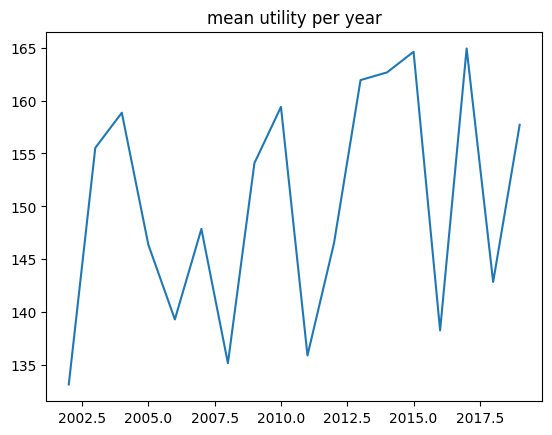

In [14]:
#check how utility changes over time - mean
df2 = df[["surveyyear", "selected plan utility"]]
df2 = df2.groupby('surveyyear', as_index=False).mean()
plt.plot(df2["surveyyear"], df2["selected plan utility"])
plt.title("mean utility per year")

Text(0.5, 1.0, 'median utility per year (including negative)')

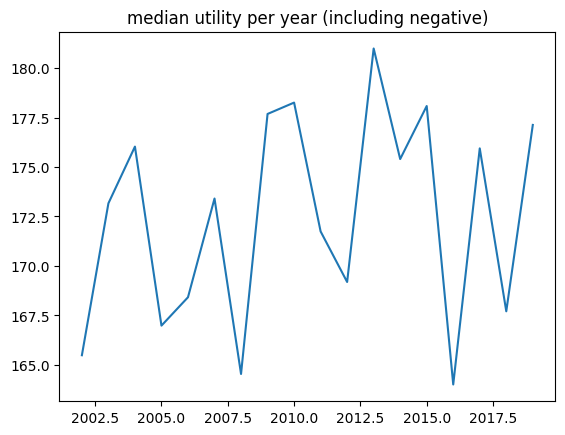

In [15]:
#check how utility changes over time - median
df2 = df[["surveyyear", "selected plan utility"]]
df2 = df2.groupby('surveyyear', as_index=False).median()
plt.plot(df2["surveyyear"], df2["selected plan utility"])
plt.title("median utility per year (including negative)")

## Calculating utility components

Travel utility

In [16]:
# 1. Get the trips out 
df["selected plan trips"] = df.apply(lambda row: moa.group_legs_into_trips(row["selected plan activity_type_or_mode"], row["activities_indices"]), axis=1)
df["unselected plan (1) trips"] = df.apply(lambda row: moa.group_legs_into_trips(row["unselected plan (1) activity_type_or_mode"], row["activities_indices"]), axis=1)
df["unselected plan (2) trips"] = df.apply(lambda row: moa.group_legs_into_trips(row["unselected plan (2) activity_type_or_mode"], row["activities_indices"]), axis=1)
df["unselected plan (3) trips"] = df.apply(lambda row: moa.group_legs_into_trips(row["unselected plan (3) activity_type_or_mode"], row["activities_indices"]), axis=1)
df["unselected plan (4) trips"] = df.apply(lambda row: moa.group_legs_into_trips(row["unselected plan (4) activity_type_or_mode"], row["activities_indices"]), axis=1)

In [17]:
# 1. Keep corresponding trip durations and distances
df["selected plan trips_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["selected plan duration"], row["activities_indices"], "duration"), axis=1)
df["unselected plan (1) trips_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (1) duration"], row["activities_indices"], "duration"), axis=1)
df["unselected plan (2) trips_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (2) duration"], row["activities_indices"], "duration"), axis=1)
df["unselected plan (3) trips_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (3) duration"], row["activities_indices"], "duration"), axis=1)
df["unselected plan (4) trips_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (4) duration"], row["activities_indices"], "duration"), axis=1)

df["selected plan trips_distance"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["selected plan distance_travelled"], row["activities_indices"], "distance"), axis=1)
df["unselected plan (1) trips_distance"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (1) distance_travelled"], row["activities_indices"], "distance"), axis=1)
df["unselected plan (2) trips_distance"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (2) distance_travelled"], row["activities_indices"], "distance"), axis=1)
df["unselected plan (3) trips_distance"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (3) distance_travelled"], row["activities_indices"], "distance"), axis=1)
df["unselected plan (4) trips_distance"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (4) distance_travelled"], row["activities_indices"], "distance"), axis=1)

In [149]:
def count_transfers(modes_in_leg):
    publicTrans = ["subway","bus","rail", "tram","ferry", "pt"]
    transfers = 0
    for i in range(len(modes_in_leg)-1):
        if modes_in_leg[i] in publicTrans and modes_in_leg[i + 1] in publicTrans:
            transfers += 1
    return transfers
# TODO: fix this to overlook short walks!
#calculate the utility lost across trips in a plan. returns a list of the utility from each trip
def calculate_travel_utility(trips, distances, durations, subpopulation):
    utilities = []
    betaTrans = -1
    match subpopulation:
        case "low":
            betaMon = 2
        case "medium":
            betaMon = 1
        case "high":
            betaMon = 0.5
        case "ev_low":
            betaMon = 2
        case "ev_medium":
            betaMon = 1
        case "ev_high":
            betaMon = 0.5
    for i in range(len(trips)):
        print(trips[i])
        STotal = 0
        transferCount = count_transfers(trips[i])
        for j in range(len(trips[i])):
            print(trips[i][j])
            print("distance is: "+str(distances[i][j]))
            print("duration is: "+str(durations[i][j]))
            match trips[i][j]:
                case "car":
                    CMode = -5
                    betaTrav = 0
                    betaDist = 0
                    if subpopulation in ["low","medium","high"]:
                        gammaDist = -2e-4 
                    elif subpopulation in ["ev_low","ev_medium","ev_high"]:
                        gammaDist = -5e-5 
                    else:
                        gammaDist = 0
                    print("gamma dist: "+str(gammaDist))
                case "car_passenger":
                    CMode = -5
                    betaTrav = 0
                    betaDist = 0
                    if subpopulation in ["low","medium","high"]:
                        gammaDist = -2e-4 
                    elif subpopulation in ["ev_low","ev_medium","ev_high"]:
                        gammaDist = -5e-5 
                    else:
                        gammaDist = 0
                    
                case "walk":
                    CMode = 0
                    betaTrav = 0
                    betaDist = -0.003
                    gammaDist = 0
                    
                case "bike":
                    CMode = -4
                    betaTrav = 0
                    betaDist = -0.0015
                    gammaDist = 0
                    
                case "bus":
                    CMode = -1
                    betaTrav = 0
                    betaDist = 0
                    gammaDist = -1.7e-4
                    
                case "tram":
                    CMode = 0
                    betaTrav = 0
                    betaDist = 0
                    gammaDist = -4e-4
                    
                case "rail":
                    CMode = -8
                    betaTrav = -0.5
                    betaDist = 0
                    gammaDist = -2e-4
                    
                case "taxi":
                    CMode = -5
                    betaTrav = 0
                    betaDist = 0
                    gammaDist = -0.002
                 
                case "ferry":
                    CMode = 0
                    betaTrav = 0
                    betaDist = 0
                    gammaDist = -0.001
                 
                case "subway":
                    CMode = 0
                    betaTrav = 0
                    betaDist = 0
                    gammaDist = -2e-4
            STime = betaTrav*(durations[i][j]/3600)
            print("STime: "+str(STime))
            SMon = 0
            print("Smon: "+str(SMon))
            SDist = (betaDist + (betaMon*gammaDist))*distances[i][j]
            print("SDist: "+str(SDist))
            STotal_temp = CMode + STime + SMon + SDist 
            STotal += STotal_temp
        STrans = transferCount * betaTrans
        print("Strans: "+str(STrans))
        STotal += STrans
        print("STotal: "+str(STotal))
        utilities.append(STotal)
    return utilities

In [150]:
df["calculated_travel_utility"] = df.apply(lambda row: calculate_travel_utility(row["selected plan trips"], row["selected plan trips_duration"], row["selected plan trips_distance"], row["subpopulation"]), axis=1)

['car']
car
distance is: 947
duration is: 13853.616805489384
gamma dist: -0.0002
STime: 0.0
Smon: 0
SDist: -0.1894
Strans: 0
STotal: -5.1894
['car']
car
distance is: 979
duration is: 13905.399392634175
gamma dist: -0.0002
STime: 0.0
Smon: 0
SDist: -0.1958
Strans: 0
STotal: -5.1958
['walk']
walk
distance is: 0
duration is: 0.0
STime: 0.0
Smon: 0
SDist: -0.0
Strans: 0
STotal: 0.0
['car']
car
distance is: 663
duration is: 13010.636924991251
gamma dist: -5e-05
STime: 0.0
Smon: 0
SDist: -0.016575
Strans: 0
STotal: -5.016575
['car']
car
distance is: 670
duration is: 13417.50400747762
gamma dist: -5e-05
STime: 0.0
Smon: 0
SDist: -0.01675
Strans: 0
STotal: -5.01675
['car']
car
distance is: 832
duration is: 9471.668373556437
gamma dist: -0.0002
STime: 0.0
Smon: 0
SDist: -0.16640000000000002
Strans: 0
STotal: -5.1664
['car']
car
distance is: 921
duration is: 10240.143932939778
gamma dist: -0.0002
STime: 0.0
Smon: 0
SDist: -0.1842
Strans: 0
STotal: -5.1842
['car']
car
distance is: 422
duration is

Activity utility

In [151]:
# just for initial sense checking, see if the calcs work for "well behaved" agents, ie those who DO wraparound and have positive utility
df_wellbehaved = df[df["selected plan utility"]>0]
df_wellbehaved = df_wellbehaved[df_wellbehaved["wraparound"]==1]

In [152]:
def get_activity_durations(activity_indices, all_durations, all_activities_trips):
    activity_start_times = []
    activity_end_times = []
    all_durations = pd.to_timedelta(all_durations, errors="coerce").seconds

    for i in range(len(activity_indices)):
        schedEndTime = all_durations[activity_indices[i]]
        if activity_indices[i]==0:
            startTime = 0
        else:
            prevEndTime = all_durations[activity_indices[i-1]]
            x1 = activity_indices[i-1]+1
            x2 = activity_indices[i]
            startTime = prevEndTime+sum(all_durations[x1:x2])  
        if startTime >= schedEndTime:
            realEndTime = startTime +1
        else:
            realEndTime = schedEndTime
        activity_start_times.append(startTime)
        activity_end_times.append(realEndTime)
    # print("start: "+str(activity_start_times))
    # print("end: "+str(activity_end_times))
    
    for i in range(1, len(activity_end_times)):
        if activity_end_times[i] < activity_end_times[i-1]:
            activity_end_times[i] += 24*3600  #account for wraparound
    # print("end new: "+str(activity_end_times))
   
    activity_durations = list(map(operator.sub, list(activity_end_times), list(activity_start_times)))
   
    if all_activities_trips[0] == all_activities_trips[-1]:
        activity_durations[0]=activity_durations[0]+((24*3600)-activity_start_times[-1]) #make it wrap around to midnight
        activity_durations.pop() #remove last activity duration as it has been included in the frist activity
    
    for k in range(len(activity_durations)):
        if activity_durations[k]== 0:
            activity_durations[k] = 1e-5
    
    return(activity_durations)     

# TODO: account for non-wraparound effect - HOW DOES THIS WORK
# TODO: when accounting for wraparound effect the final "end time" is basically ignored - is this ok?
# TODO: account for if someone arrives after departure -> set activity length to 1 second and continue on
# TODO: cutoff when not achieving full activity plan - up to 32 hours / journey longer than expected departure

In [153]:
def get_activity_durations_terrible(activity_indices, all_durations):
    activity_start_times = []
    activity_end_times = []
    all_durations = pd.to_timedelta(all_durations, errors="coerce").seconds

    arrive_after_start = 0

    for i in range(len(activity_indices)):
        activity_end_times.append(all_durations[activity_indices[i]])
        if activity_indices[i]==0:
            tempStart = 0
        else:
            prevEndTime = all_durations[activity_indices[i-1]]
            x1 = activity_indices[i-1]+1
            x2 = activity_indices[i]
            tempStart = prevEndTime+sum(all_durations[x1:x2])  
        activity_start_times.append(tempStart)
    # print("start: "+str(activity_start_times))
    # print("end: "+str(activity_end_times))
    
    for i in range(1, len(activity_end_times)):
        if activity_end_times[i] < activity_end_times[i-1]:
            activity_end_times[i] += 24*3600  #account for wraparound
    # print("end new: "+str(activity_end_times))

    for i in range(len(activity_start_times)):
        if activity_start_times[i]>activity_end_times[i]:
            arrive_after_start += 1
    
    return(arrive_after_start)     
#run this across population and examine the experienced plans for any with an output > 0

In [154]:
def calculate_activity_utility(activities, durations):
    utilities = []
    # betaEarly = 0
    # betaLate = 0
    betaPerf = 10
    # betaWait = 0
    # betaShort = 0
    prio = 1
    durations = [a/3600 for a in durations]  #put it back into hours
    if activities[-1] == activities[0]:
        activities.pop() #remove the last activity for wraparound
    for i in range(len(activities)):
        # print(activities[i])
        # print(durations[i])
        STotal = 0
        match activities[i]:
            case "home":
                tMin = 1
                tTyp = 10
            case "work":
                tMin = 6
                tTyp = 9
            case "other":
                tMin = 1/6
                tTyp = 0.5
            case "shop": 
                tMin = 0.5
                tTyp = 0.5
            case "education":
                tMin = 6
                tTyp = 6
            case "visit":
                tMin = 0.5
                tTyp = 2
            case "medical":
                tMin = 0.5
                tTyp = 1
            case "business":
                tMin = 0.5
                tTyp = 1
            case "escort_home":
                tMin = 1/12
                tTyp = 1/12
            case "escort_work":
                tMin = 1/12
                tTyp = 1/12
            case "escort_business":
                tMin = 1/12
                tTyp = 1/12
            case "escort_education":
                tMin = 1/12
                tTyp = 1/12
            case "escort_other":
                tMin = 1/12
                tTyp = 1/12
            case "escort_shop":
                tMin = 1/12
                tTyp = 1/12      
            case _:
                print("dodgy activity type")
                tMin = np.nan
                tTyp = np.nan
        # print("tTyp: "+str(tTyp))
        t0 = tTyp*np.exp(-1/prio)
        # print("t0: "+str(t0))
        SDur = betaPerf*tTyp*np.log(durations[i]/t0)
        SWait = 0 #since betaWait is zero. Otherwise, will need to encode open/close times for activities to find out how long waiting       
        SLate = 0 #since betaLate is zero. Otherwise, will need to encode latest start times for activities to find out how late   
        SEarly = 0 #since betaEarly is zero. Otherwise, will need to encode earliest end times for activities to find out how early   
        SShort = 0 #since betaEarly is zero/undefined. Otherwise, will need to use shortesr durations for activities to find out if too short   
        STotal_temp = SDur + SWait + SLate + SEarly + SShort
        STotal += STotal_temp
        # print("STotal: "+str(STotal))
        utilities.append(STotal)
    return utilities

In [155]:
def get_activities(activity_modes, activity_indices):
    activities = []
    for i in activity_indices:
        activities.append(activity_modes[i])
    return activities

In [156]:
df_wellbehaved["activity_durations"] = df_wellbehaved.apply(lambda row: get_activity_durations(row["activities_indices"], row["selected plan duration"], row["selected plan activity_type_or_mode"]), axis=1)

In [157]:
df_wellbehaved["selected plan activities"] = df_wellbehaved.apply(lambda row: get_activities(row["selected plan activity_type_or_mode"], row["activities_indices"]), axis=1)

In [158]:
df_wellbehaved["calculated_activity_utility"] = df_wellbehaved.apply(lambda row: calculate_activity_utility(row["selected plan activities"], row["activity_durations"]), axis=1)

In [159]:
df_wellbehaved["total_travel_u"] = df_wellbehaved.apply(lambda row: sum(row["calculated_travel_utility"]), axis=1)
df_wellbehaved.iloc[119]["total_travel_u"]

np.float64(-21.6924)

In [160]:
df_wellbehaved["total_activity_u"] = df_wellbehaved.apply(lambda row: sum(row["calculated_activity_utility"]), axis=1)
df_wellbehaved.iloc[119]["total_activity_u"]

np.float64(108.33103034411896)

In [161]:
df_wellbehaved["calculated_total_u"] = df_wellbehaved["total_travel_u"]+df_wellbehaved["total_activity_u"]
df_wellbehaved.iloc[119]["calculated_total_u"]

np.float64(86.63863034411895)

In [162]:
df_wellbehaved["travel_tot"] = df_wellbehaved["calculated_travel_utility"].apply(lambda x: sum(x))
df_wellbehaved["activity_tot"] = df_wellbehaved["calculated_activity_utility"].apply(lambda x: sum(x))

In [163]:
print(max(df_wellbehaved["travel_tot"]))
print(min(df_wellbehaved["travel_tot"]))
print(max(df_wellbehaved["activity_tot"]))
print(min(df_wellbehaved["activity_tot"]))

0.0
-101.81400000000001
431.46981193576636
-768.9675248750369


(array([ 10.,   0.,   0.,   1.,   1.,   9.,  61., 312., 959.,   3.]),
 array([-789.53700572, -670.49796896, -551.45893219, -432.41989543,
        -313.38085866, -194.34182189,  -75.30278513,   43.73625164,
         162.7752884 ,  281.81432517,  400.85336194]),
 <BarContainer object of 10 artists>)

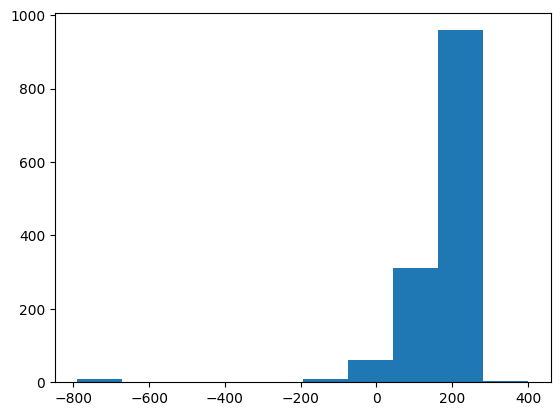

In [164]:
plt.hist(df_wellbehaved["calculated_total_u"])

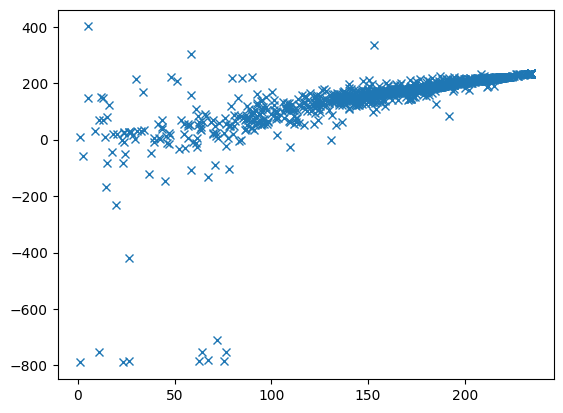

In [165]:
plt.plot(df_wellbehaved["selected plan utility"], df_wellbehaved["calculated_total_u"], "x")

In [166]:
us = (list(df_wellbehaved["calculated_total_u"]))

In [167]:
for i in range(len(us)):
    if  us[i] < -400:
        print(i)

42
210
365
429
626
867
1011
1020
1047
1275
1317


In [127]:
df_wellbehaved.iloc[31]["calculated_total_u"]

np.float64(-29543.409628853122)

In [177]:
df_wellbehaved.iloc[210]["calculated_travel_utility"]

[np.float64(-5.008925),
 np.float64(-5.008975),
 np.float64(-5.01315),
 np.float64(-5.011725)]

In [184]:
df_wellbehaved.iloc[626]["selected plan utility"]

np.float64(67.4870112623465)

In [180]:
df_wellbehaved.iloc[626]["selected plan duration"]

['07:16:00',
 '00:00:23',
 '00:00:01',
 '00:46:36',
 '00:00:29',
 '00:35:26',
 '00:03:43',
 '17:51:11',
 '00:00:01',
 '00:03:43',
 '00:41:05',
 '00:00:29',
 '00:35:26',
 '00:01:56',
 '19:08:08',
 '00:05:50',
 '19:48:45',
 '00:05:10',
 '24:10:40']

In [181]:
df_wellbehaved.iloc[626]["selected plan distance_travelled"]

['N/A',
 '96.97023184369066',
 '0.0',
 '29873.171854337197',
 '29.0',
 '14760.4439732055',
 '186.54648172213533',
 'N/A',
 '1.1518907575866018',
 '186.0',
 '14760.4439732055',
 '29.0',
 '29873.171854337197',
 '96.97023184369066',
 'N/A',
 '3761.2169260504734',
 'N/A',
 '2010.5790803967705',
 'N/A']

In [182]:
df_wellbehaved.iloc[626]["selected plan activity_type_or_mode"]

['home',
 'bike',
 'walk',
 'rail',
 'walk',
 'subway',
 'walk',
 'work',
 'walk',
 'walk',
 'subway',
 'walk',
 'rail',
 'walk',
 'home',
 'car',
 'shop',
 'car',
 'home']

In [189]:
df_wellbehaved.iloc[626]["activity_durations"]

[np.int32(40925), np.int32(32913), np.int32(1), np.int32(2087)]

In [175]:
df_wellbehaved.iloc[210]["calculated_activity_utility"]

[np.float64(183.7692351028651),
 np.float64(9.183832041674309),
 np.float64(-949.1274217438248),
 np.float64(24.441781276748674)]

In [131]:
df_wellbehaved.iloc[31]["selected plan trips"]

[['bike', 'rail', 'walk', 'car'],
 ['walk', 'subway', 'walk', 'rail', 'walk', 'car']]

In [124]:
list(df_wellbehaved.columns.values)

['Unnamed: 0',
 'id',
 'age',
 'age_group',
 'area_type',
 'carAvail',
 'car_avail',
 'car_competition',
 'disabled',
 'ev',
 'gender',
 'hasBike',
 'hasCar',
 'hasDisability',
 'hasLicence',
 'hcounty',
 'hhincome',
 'hholdnumchildren',
 'hhsize',
 'hid',
 'hid_old',
 'householdid',
 'hzone',
 'indincome',
 'individualid',
 'intermodalBike',
 'intermodalCar',
 'intermodalPassenger',
 'intermodalTaxi',
 'marital_status',
 'occupation',
 'region',
 'seasontickettype',
 'sex',
 'subpopulation',
 'surveyyear',
 'vehicles',
 'wfh',
 'workstatus',
 'selected plan activity_type_or_mode',
 'selected plan distance_travelled',
 'selected plan duration',
 'selected plan location',
 'selected plan number',
 'selected plan utility',
 'unselected plan (1) activity_type_or_mode',
 'unselected plan (1) distance_travelled',
 'unselected plan (1) duration',
 'unselected plan (1) location',
 'unselected plan (1) number',
 'unselected plan (1) utility',
 'unselected plan (2) activity_type_or_mode',
 'uns

In [134]:
a = df_wellbehaved.iloc[31]["selected plan trips"]
b = df_wellbehaved.iloc[31]["selected plan trips_distance"]
c = df_wellbehaved.iloc[31]["selected plan trips_duration"]
d = "high"

In [137]:
travtest = calculate_travel_utility(a,b,c,d)
print(travtest)

['bike', 'rail', 'walk', 'car']
bike
distance is: 2572.037120434406
duration is: 617
STime: 0.0
Smon: 0
SDist: -3.858055680651609
rail
distance is: 29719.64684490959
duration is: 2261
STime: -0.3140277777777778
Smon: 0
SDist: -2.971964684490959
walk
distance is: 0.0
duration is: 0
STime: 0.0
Smon: 0
SDist: -0.0
car
distance is: 5264.236680266699
duration is: 563
gamma dist: -0.0002
STime: 0.0
Smon: 0
SDist: -0.52642366802667
Strans: 0
STotal: -24.670471810947017
['walk', 'subway', 'walk', 'rail', 'walk', 'car']
walk
distance is: 355.89088317777635
duration is: 427
STime: 0.0
Smon: 0
SDist: -1.067672649533329
subway
distance is: 4143.323506903771
duration is: 782
STime: 0.0
Smon: 0
SDist: -0.4143323506903771
walk
distance is: 322.0
duration is: 382
STime: 0.0
Smon: 0
SDist: -0.966
rail
distance is: 29719.64684490959
duration is: 2373
STime: -0.32958333333333334
Smon: 0
SDist: -2.971964684490959
walk
distance is: 0.0
duration is: 0
STime: 0.0
Smon: 0
SDist: -0.0
car
distance is: 2390.078

## Whole plan modal flexibility

This requires the function to choose only the longest leg per trip and use that as a proxy for simplicity. Then compare the plan's set of main modes across plans and compare this to utility change across plans. Completed in old code setup. Skipped for now here. 

## Trip-based modal flexibility

Here we can unpick the utility function and compare utility for a person for a given trip. We can look at either a given trip number (e.g., first trip of the day), the longest (distance) trip, a given trip purpose (e.g., travel to work), or get a composite across the whole day (complex!!). We can also look at just the longest leg of the trip for simplicity or look at the total set of legs together. To do this well, we need to understand the config files properly though - **AGH**.

### First trip of the day, combining all legs

1. Separate out the trips and choose the first (for each plan)
2. Find the change in mode by comparing the whole combination of modes -> check, this might be problematic and we may need to revert to looking at main mode (by distance) for this step
3. Calculate the utility lost for each leg and sum to find utility of trip. For each plan
4. Find the change in utility across plans
5. Find the flexibility by comparing change in mode to change in plans